In [1]:
import pandas as pd
import numpy as np
import time
import joblib

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from quadratic_weighted_kappa import quadratic_weighted_kappa

from scipy.spatial.distance import pdist,squareform

from collections import Counter

In [2]:
x = joblib.load('essay_laser_asap7')
y = joblib.load('score_asap7').to_numpy()
#pred = joblib.load('score_model_gb_normalized_float_ngram')
x_normed = x / x.max(axis=0)

In [3]:
traits = joblib.load('df_essay7_traits_sum')

In [4]:
x.shape

(1569, 1024)

## 1569 essays

In [5]:
dist_euclid = pdist(x, metric='cosine')

In [6]:
outcome_euclid = pdist(y.reshape(-1,1), metric='euclidean')

In [7]:
dist = dist_euclid
outcome = outcome_euclid

### Min-Max Normalization

In [8]:
dist_minmax = (dist-min(dist))/(max(dist)-min(dist))
outcome = (outcome-min(outcome))/(max(outcome)-min(outcome))

### Max Normalization

In [9]:
dist_max = dist / dist.max()
outcome = outcome / outcome.max()

### Plot

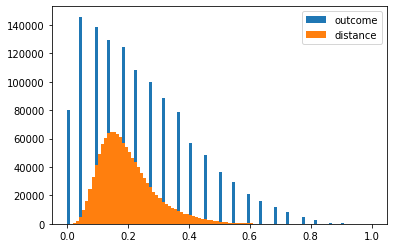

In [10]:
plt.hist(outcome, bins=100, label='outcome')
plt.hist(dist_minmax, bins=100, label='distance')
plt.legend()
plt.show()

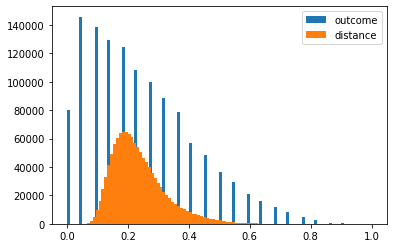

In [11]:
plt.hist(outcome, bins=100, label='outcome')
plt.hist(dist_max, bins=100, label='distance')
plt.legend()
plt.show()

In [16]:
dist = squareform(dist_minmax)
outcome = squareform(outcome)

## Evaluate whether pairs of essay satisfy the equation

\begin{equation}
    D(Mx, My) \leq d(x,y)
\end{equation}

In [17]:
IF = outcome <= dist
IF

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True, False,  True]])

In [18]:
(np.count_nonzero(IF) - 1569) / 2

558432.0

## Number of True pairs (MinMax)

Number of pairs (excluding with selves): 1.230.096 pairs  
x 558432 : 45.4%  

## Number of True pairs (Max)

Number of pairs (excluding with selves): 1.230.096 pairs  
x 660982 : 53.7%  